# Algoritmos Genéticos

Introdução
------

Com a finalidade de aplicar os conceitos de algoritmos genéticos, o estudo abaixo visa implementá-los computacionalmente e, desta maneira, com os resultados obtidos o mesmo permitirá uma análise da eficácia desses algoritmos para resolução de determinados grupos de problemas, como os de otimização e os de busca.

Referencial Teórico
------

Algoritmos genéticos são algoritmos inspirados na seleção natural definido por Charles Darwin e pertencem à classe dos algoritmos evolucionários. Possuem metas de "abstrair e rigorosamente explicar os processos adaptativos em sistemas naturais" e "desenvolver simulações em computador que retenham os mecanismos originais encontrados em sistemas naturais". As características principais são: existir espaços genotípicos e fenotípicos; fazer busca em cima de uma população e não sobre um único indivíduo e; utilizar regras probabilísticas de transição, em oposição às determinísticas.
Esses algoritmos geralmente possuem cinco etapas bem definidas: geração da população inicial; calculo de afinidade com o objetivo, também chamado de _fitness_; seleção; reprodução e; mutação.
População, neste cenário, é o conjunto de indivíduos e esses são as possíveis soluções do problema a ser resolvido. Neste momento, é definido como será codificado (genes - como cada parâmetro é represntado - e cromossomo - conjunto desses genes) esses indivíduos.

Metologia Experimental
------



Resultados e Discussões
------

Conclusão
------

In [1]:
import chainer
import matplotlib
import matplotlib.pyplot as plt
from random import *
from pandas import *
import numpy as np
from functools import reduce
from multiprocessing import Pool
%matplotlib inline

In [111]:
n_lines = 28
n_columns = 28
n_population = 100
n_generations = 1000
mutation_prob = 50

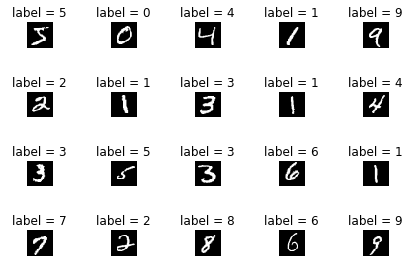

In [112]:
# Load the MNIST dataset from pre-inn chainer method
train, test = chainer.datasets.get_mnist(ndim = 1)

ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = train[i][0].reshape(n_lines, n_columns)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i + 1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap = 'gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(train[i][1]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.savefig("mnist_plot.png")
plt.show()

In [113]:
image_number = train[13][0].reshape(n_lines, n_columns)

In [114]:
def zeroOrOne(lst):
    for i in range(len(lst)):
        if lst[i] < 0.5:
            lst[i] = 0
        else:
            lst[i] = 1
    return lst

In [115]:
image2_number = [[0] * n_columns for _ in range(n_lines)]
array_number = []

for i in range(n_lines):
    for j in range(n_columns):
        a = image_number[i][j]
        if a < 0.5:
            a = 0
        else:
            a = 1
        array_number.append(a)

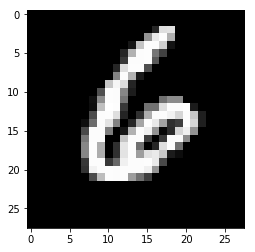

In [116]:
plt.imshow(image_number, cmap='gray')

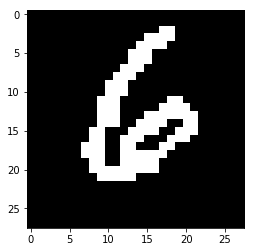

In [117]:
if __name__ == '__main__':
    with Pool(5) as p:
        image2_number = p.map(zeroOrOne, image_number)

plt.imshow(image2_number, cmap = 'gray')

In [118]:
# Cálculo de fitness
def fitness_calculation(reference, pop):
    fitness = []
    for p in pop:
        aux = 0
        for col in range(len(p)):
            if reference[col] == p[col]:
                aux = aux + 1
        fitness.append(aux)
    return (reduce((lambda x, y: x + y), fitness), fitness)

In [119]:
def population_generation():
    return np.ndarray.tolist(np.random.randint(2, size = (n_population, n_lines * n_columns)))

In [120]:
def evolution_algorithm(population):
    max_fitness_per_generation = []
    _, ft = fitness_calculation(array_number, population)
    max_fitness_per_generation.append(max(ft))

    for gen in range(n_generations):
        total_fitness, actual_fitness = fitness_calculation(array_number, population)

        # Seleção Natural
        # Determinação dos pais desta geração
        abs_pop_fitness = []
        parents = []

        for pop in range(n_population):
            if pop == 0:
                prev = 0
            else:
                prev = abs_pop_fitness[pop - 1]
            abs_pop_fitness.append(prev + actual_fitness[pop])

        for pop in range(n_population // 2):
            aux1 = 0
            aux2 = 0

            rn = randint(0, total_fitness)

            for pop2 in range(n_population):
                if(rn <= abs_pop_fitness[pop2]):
                    aux1 = pop2
                    aux2 = pop2
                    break

            while aux1 == aux2:
                rn = randint(0, total_fitness)
                for pop3 in range(n_population):
                    if(rn <= abs_pop_fitness[pop3]):
                        aux2 = pop3
                        break
            parents.append([aux1, aux2])

        # Reprodução
        new_gen = []

        for ng in parents:
            x = population[ng[0]]
            y = population[ng[1]]
            crossover_point = randint(1, len(x) - 1)

            new_gen.append(x[0 : crossover_point] + y[crossover_point : len(x)])
            new_gen.append(y[0 : crossover_point] + x[crossover_point : len(x)])

        # Mutação
        for ng in new_gen:
            for b in ng:
                pm = randint(0, 100)
                if pm > (100 - mutation_prob):
                    if ng[b] == 1:
                        ng[b] = 0
                    else:
                        ng[b] = 1

        population = new_gen
        _,ft = fitness_calculation(array_number, population)
        max_fitness_per_generation.append(max(ft))
        
    return max_fitness_per_generation

Fitness máximo: 458
Último fitness: 441
Adequação a solução ideal: 56.25%


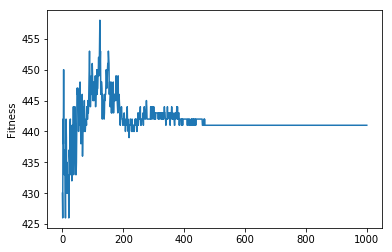

In [121]:
max_fitness_per_generation = evolution_algorithm(population_generation())
nmax = max(max_fitness_per_generation)
last_fitness = max_fitness_per_generation[len(max_fitness_per_generation) - 1]

print("Fitness máximo: {}".format(nmax))
print("Último fitness: {}".format(last_fitness))
print("Adequação a solução ideal: {:5.2f}%".format(last_fitness / (n_lines * n_columns) * 100.0))
plt.plot(max_fitness_per_generation)
plt.ylabel('Fitness')
plt.show()

In [ ]:
rows = 3
columns = 3
for i in range(rows * columns):
    image = train[i][0].reshape(n_lines, n_columns)
    plt.subplot(rows, columns, i + 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('label = {}'.format(train[i][1]))
plt.tight_layout()
plt.savefig("mnist_plot.png")
plt.show()